In [1]:
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.io.wavfile
import scipy.signal
from IPython.display import Audio
import wavio

fs, wave = scipy.io.wavfile.read('fluteircam.wav')
print('Data:', wave)
print('Sampling rate:', fs)
print('Audio length:', wave.size/fs, 'seconds')
print('Lowest amplitude:', min(wave))
print('Highest amplitude:', max(wave))

Audio('fluteircam.wav')

Data: [0 0 0 ... 0 0 0]
Sampling rate: 32000
Audio length: 13.685 seconds
Lowest amplitude: -7864
Highest amplitude: 9186


In [2]:
def plotwave(fs, signal, maxf=None):
    """Visualize (a segment of) a wave file."""
    # maxf = maximum number of frames
    frames = scipy.arange(signal.size)   # x-axis
    if maxf:
        plt.figure(figsize=(16, 6))
        plt.plot(frames[:maxf], signal[:maxf])
        plt.xticks(scipy.arange(0, maxf, 0.5*fs), scipy.arange(0, maxf/fs, 0.5))
        plt.show()
    else:
        plt.figure(figsize=(16, 6))
        plt.plot(frames, signal)
        plt.xticks(scipy.arange(0, signal.size, 0.5*fs), scipy.arange(0, signal.size/fs, 0.5))
        plt.show()

import numpy as np

def spectral_centroid(x, samplerate):
    magnitudes = np.abs(np.fft.rfft(x)) # magnitudes of positive frequencies
    length = len(x)
    freqs = np.abs(np.fft.fftfreq(length, 1.0/samplerate)[:length//2+1]) # positive frequencies
    return np.sum(magnitudes*freqs) / np.sum(magnitudes) # return weighted mean

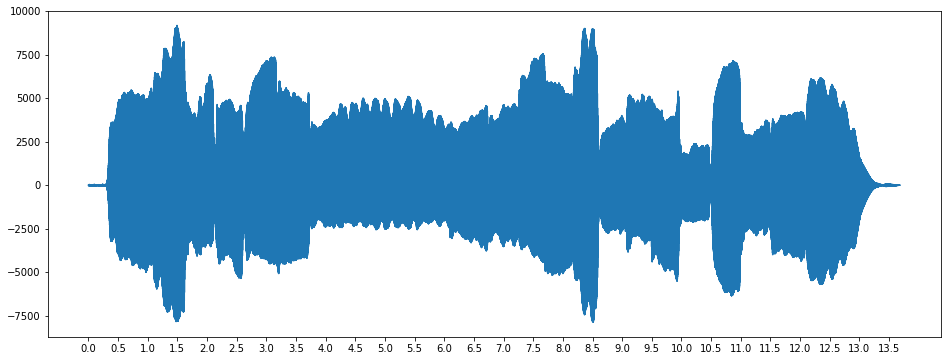

In [3]:
plotwave(fs, wave)

1482.1124544344461


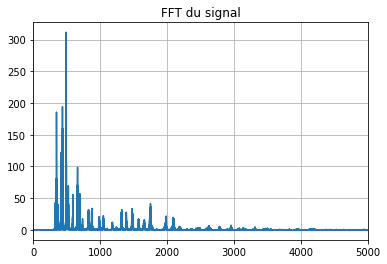

In [4]:
import numpy as np
N=len(wave)
xf = np.linspace(-1.0/2.0*fs, 1.0/2.0*fs, N)
yf = scipy.fftpack.fft(wave)
yf = np.fft.fftshift(yf)
fig, ax = plt.subplots()

ax.plot(xf, 1.0/N *np.abs(yf) )
plt.xlim(0,5000)
plt.title('FFT du signal')

plt.grid()
print(spectral_centroid(wave, samplerate=fs))


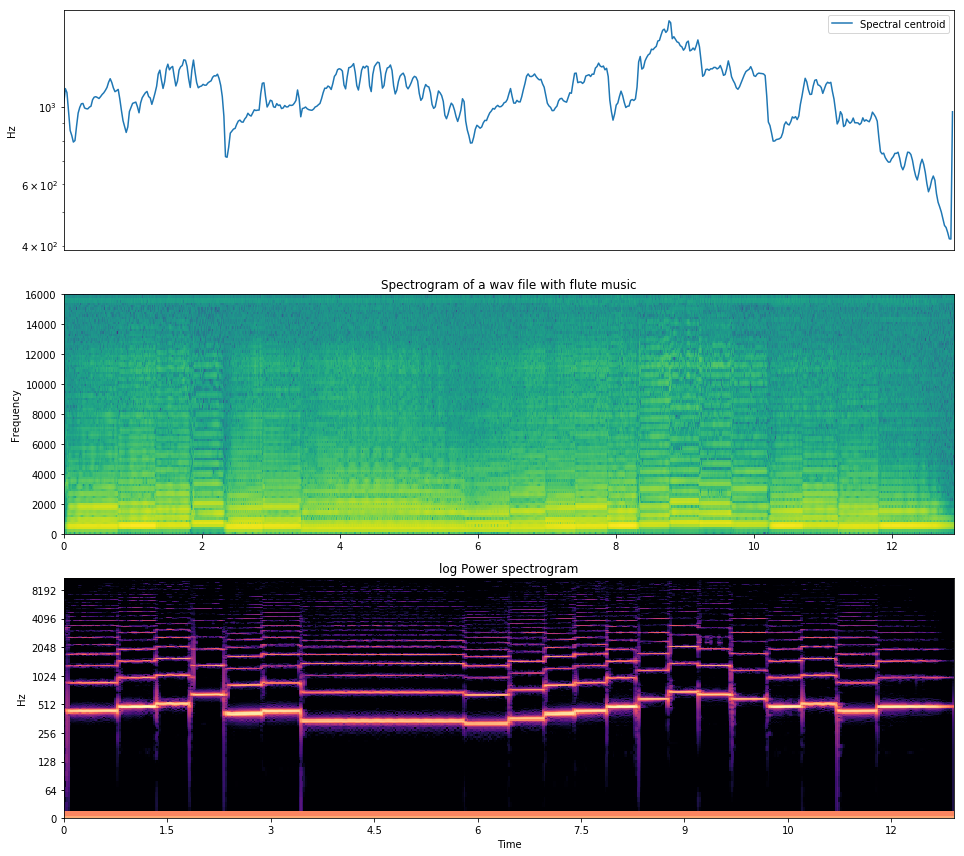

In [5]:
import numpy
#import the pyplot and wavfile modules  
import matplotlib.pyplot as plot
from scipy.io import wavfile 
samplingFrequency, signalData = wavfile.read('fluteircam.wav')
signalData=signalData[int(0.3*N/14):int(13.5*N/14)]
wavio.write("signalmod.wav", signalData, fs, sampwidth=3)
Audio('signalmod.wav')


# Read the wav file (mono)


# Plot the signal read from wav file
plt.figure(figsize=(13.5, 12))
plt.subplot(3, 1, 2)
plt.title('Spectrogram of a wav file with flute music')

plt.specgram(signalData, NFFT=200, Fs=samplingFrequency) 
plt.ylabel('Frequency')

import librosa
y, sr = librosa.load('signalmod.wav')
cent = librosa.feature.spectral_centroid(y=y, sr=sr)

S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_centroid(S=S)

if_gram, D = librosa.ifgram(y)
librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)

import librosa.display
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.subplot(3, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),y_axis='log', x_axis='time')
plt.title('log Power spectrogram')
plt.tight_layout()


plt.show()



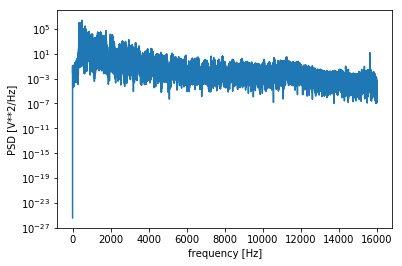

In [6]:
f, Pxx_den = scipy.signal.periodogram(signalData, fs)
plt.semilogy(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

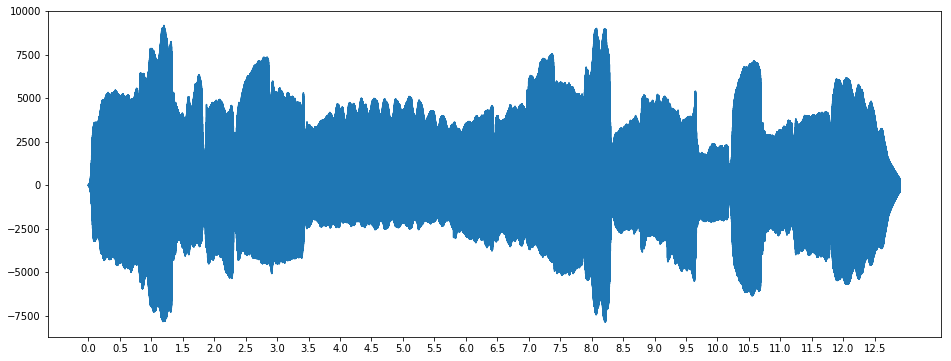

In [7]:
plotwave(fs, signalData, maxf=None)

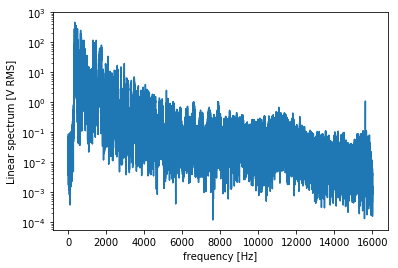

In [8]:
f, Pxx_spec = scipy.signal.periodogram(signalData, fs, 'flattop', scaling='spectrum')
plt.figure()
plt.semilogy(f, np.sqrt(Pxx_spec))
plt.xlabel('frequency [Hz]')
plt.ylabel('Linear spectrum [V RMS]')
plt.show()

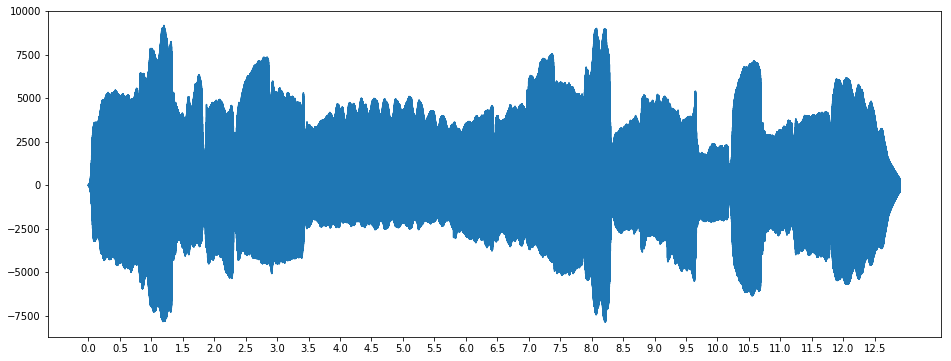

In [9]:

plotwave(fs, signalData, maxf=None)

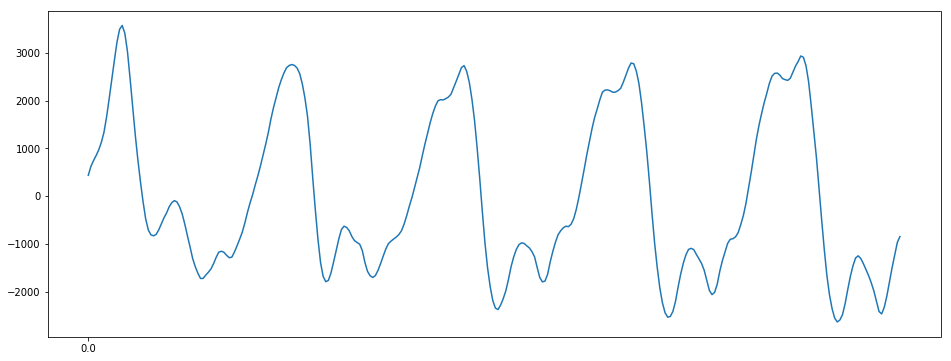

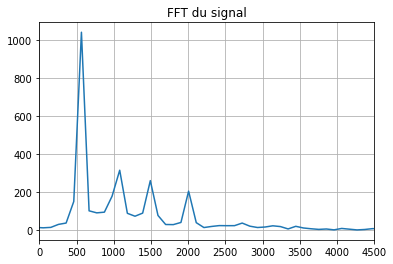

In [10]:
t1,t2=0.8,0.81
plotwave(fs, signalData[int(t1*N/14):int(t2*N/14)])
L=len(signalData[int(t1*N/14):int(t2*N/14)])
xf = np.linspace(-1.0/2.0*fs, 1.0/2.0*fs, L)
yf = scipy.fftpack.fft(signalData[int(t1*N/14):int(t2*N/14)])
yf = np.fft.fftshift(yf)
fig, ax = plt.subplots()

ax.plot(xf, 1.0/L *np.abs(yf) )
plt.xlim(0,4500)
plt.title('FFT du signal')

plt.grid()

In [11]:
import librosa
y, sr = librosa.load('signalmod.wav')
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
cent

array([[1022.69792205, 1126.73884612, 1097.58818298,  972.11565313,
         855.02869308,  827.50494862,  792.22538954,  800.16347717,
         880.58444838,  959.32988769,  995.82044746, 1019.73609772,
        1021.65062265,  992.02783949,  987.24132365,  985.74651253,
         997.06618545, 1003.46986233, 1047.06882376, 1064.93091897,
        1068.26427838, 1062.87816438, 1055.49841605, 1069.01149074,
        1084.43104039, 1096.26208048, 1113.94190293, 1135.44813453,
        1175.14770695, 1202.65434515, 1173.10379449, 1131.64692548,
        1104.16213649, 1111.79284366, 1120.85868651, 1052.9944691 ,
         976.7162153 ,  912.48262152,  876.86609105,  844.18290295,
         875.37608162,  968.78544888,  994.97037857, 1022.36809569,
        1026.77997369, 1030.91784802, 1000.16529642,  960.77186932,
        1025.41712084, 1061.05951687, 1079.51277671, 1096.45327588,
        1105.96311817, 1069.37057255, 1059.23283604, 1015.83167632,
        1052.17753043, 1094.87327386, 1144.80682

In [12]:
print(spectral_centroid(signalData[int(t1*N/14):int(t2*N/14)], samplerate=fs))
wavio.write("2note.wav", signalData[int(t1*N/14):int(t2*N/14)], fs, sampwidth=3)
Audio('2note.wav')
S, phase = librosa.magphase(librosa.stft(y=y))
librosa.feature.spectral_centroid(S=S)

1773.0821583012996


array([[1022.69792205, 1126.73884612, 1097.58818298,  972.11565313,
         855.02869308,  827.50494862,  792.22538954,  800.16347717,
         880.58444838,  959.32988769,  995.82044746, 1019.73609772,
        1021.65062265,  992.02783949,  987.24132365,  985.74651253,
         997.06618545, 1003.46986233, 1047.06882376, 1064.93091897,
        1068.26427838, 1062.87816438, 1055.49841605, 1069.01149074,
        1084.43104039, 1096.26208048, 1113.94190293, 1135.44813453,
        1175.14770695, 1202.65434515, 1173.10379449, 1131.64692548,
        1104.16213649, 1111.79284366, 1120.85868651, 1052.9944691 ,
         976.7162153 ,  912.48262152,  876.86609105,  844.18290295,
         875.37608162,  968.78544888,  994.97037857, 1022.36809569,
        1026.77997369, 1030.91784802, 1000.16529642,  960.77186932,
        1025.41712084, 1061.05951687, 1079.51277671, 1096.45327588,
        1105.96311817, 1069.37057255, 1059.23283604, 1015.83167632,
        1052.17753043, 1094.87327386, 1144.80682

In [13]:
if_gram, D = librosa.ifgram(y)
librosa.feature.spectral_centroid(S=np.abs(D), freq=if_gram)

array([[1020.42143902, 1125.66982376, 1096.92797812,  971.67061531,
         854.46009873,  826.71669124,  791.70209752,  799.48128429,
         879.71185003,  958.87298412,  995.59421307, 1019.2971036 ,
        1020.92217528,  991.32542133,  987.0044828 ,  985.45846095,
         996.3658641 , 1002.84793319, 1046.58920424, 1064.6845535 ,
        1067.72846381, 1062.21840405, 1054.98995824, 1068.46596097,
        1084.09879854, 1095.88629608, 1113.35465444, 1135.02141097,
        1174.94276253, 1202.28400603, 1172.60813116, 1131.06557205,
        1103.52594622, 1111.45646423, 1120.76369471, 1052.95279098,
         976.15515012,  912.02168813,  876.3798186 ,  843.78768799,
         874.6551055 ,  968.29167896,  994.75071715, 1021.9662195 ,
        1026.4473446 , 1030.51106651,  999.6904852 ,  960.04525227,
        1024.80941452, 1060.50481671, 1079.16246153, 1096.22032863,
        1105.56517766, 1069.05964252, 1058.71688572, 1015.24922963,
        1051.66460992, 1094.66444883, 1144.76147

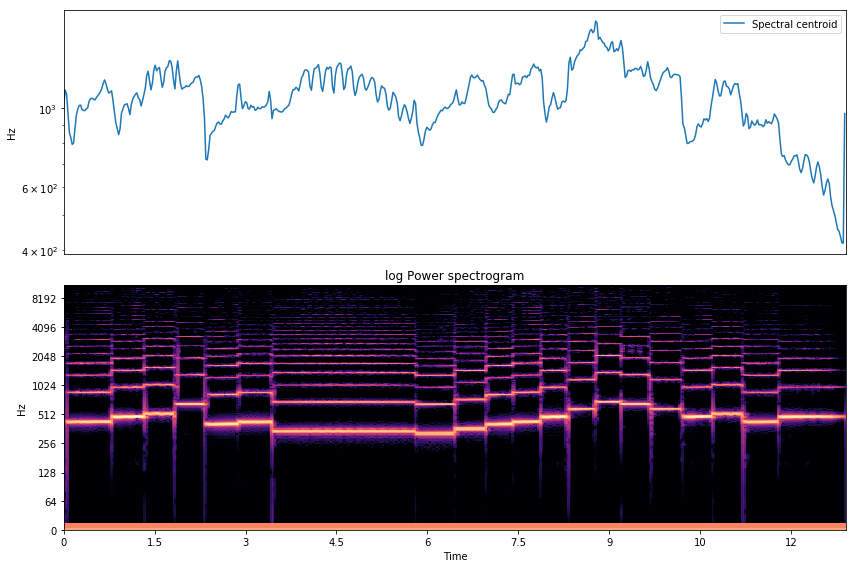

In [39]:
import librosa
import librosa.display
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()
plt.subplot(2, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                        y_axis='log', x_axis='time')
plt.title('log Power spectrogram')

plt.tight_layout()
plt.show()

In [46]:
N1=len(signalData)
Tn=[]
eps=15
k=np.arange(0,13,0.1)
ymax=0
n=0
t=float(1/fs)
for i in k:
    n = len(signalData[int(i*N1/13):int((i+0.032)*N1/13)])
    Y = scipy.fftpack.fft(signalData[int(i*N1/13):int((i+0.032)*N1/13)])
    freq = scipy.fftpack.fftfreq(n) * fs
    y1=abs(freq[np.argmax(abs(Y))])
#    plt.plot(freq,abs(Y))
#    plt.xlim(0,4500)
#    plt.figure()
#    print(y)
    if (abs(y1-ymax)>eps):
        Tn.append(i)
    ymax=y1
       
    
    

In [52]:
Tn.append(13)
Tn

[0.0,
 0.8,
 1.4000000000000001,
 1.9000000000000001,
 2.4000000000000004,
 2.9000000000000004,
 3.5,
 5.9,
 6.5,
 7.1000000000000005,
 7.5,
 8.0,
 8.4,
 8.9,
 9.3,
 9.8,
 10.3,
 10.8,
 11.3,
 11.9,
 13]

In [53]:
from math import log2, pow

A4 = 440
C0 = A4*pow(2, -4.75)
name = ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"]
    
def pitch(freq):
    h = round(12*log2(freq/C0))
    octave = h // 12
    n = h % 12
    return name[n] + str(octave)


In [54]:
import collections
notes=d = collections.OrderedDict()
for t in range(len(Tn)-1):
    lo = len(signalData[int(Tn[t]*N1/13):int(Tn[t+1]*N1/13)])
    Y = scipy.fftpack.fft(signalData[int(Tn[t]*N1/13):int(Tn[t+1]*N1/13)])
    freq = scipy.fftpack.fftfreq(lo) * fs
    note=abs(freq[np.argmax(abs(Y))])
    notes[str(round(Tn[t],2))+' to '+str(round(Tn[t+1],2))]=[note]
    notes[str(round(Tn[t],2))+' to '+str(round(Tn[t+1],2))].append(pitch(note))
#    plt.plot(freq,abs(Y))
#    plt.xlim(0,4500)
#    plt.figure()


In [55]:
notes

OrderedDict([('0.0 to 0.8', [438.28715365239293, 'A4']),
             ('0.8 to 1.4', [491.997691137115, 'B4']),
             ('1.4 to 1.9', [525.9114665323342, 'C5']),
             ('1.9 to 2.4', [660.9571788413098, 'E5']),
             ('2.4 to 2.9', [415.0872111328002, 'G#4']),
             ('2.9 to 3.5', [436.584981896416, 'A4']),
             ('3.5 to 5.9', [348.01317118606266, 'F4']),
             ('5.9 to 6.5', [327.43873642231205, 'E4']),
             ('6.5 to 7.1', [369.4374475230898, 'F#4']),
             ('7.1 to 7.5', [413.06572215663124, 'G#4']),
             ('7.5 to 8.0', [439.2947103274559, 'A4']),
             ('8.0 to 8.4', [493.66391184573, 'B4']),
             ('8.4 to 8.9', [590.4282115869017, 'D5']),
             ('8.9 to 9.3', [700.1967729240456, 'F5']),
             ('9.3 to 9.8', [662.9305459353944, 'E5']),
             ('9.8 to 10.3', [590.4282115869017, 'D5']),
             ('10.3 to 10.8', [493.6716831433789, 'B4']),
             ('10.8 to 11.3', [523.9294710

In [56]:

from pysine import sine
for t in range(len(Tn)-1):
    sine(frequency=notes[str(round(Tn[t],2))+' to '+str(round(Tn[t+1],2))][0], duration=Tn[t+1]-Tn[t])
    